# Predicting Adult Census Income Using XGBoost Tree Boosting System
### Haibin Lai
### 12211612

### 2024/6/7

Tree boosting is a highly effective and widely used machine learning method. In this project, we learn a model on an Adult Census Income dataset by implementing XGBoost method from \cite{ref1}. 


## 1 Data Preparation and Wrangling 
### 1.1 Data Preparation



In [89]:
import autogluon as ag
import pandas as pd
from autogluon.tabular import TabularDataset
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split



In [90]:
train_data = pd.read_csv('data/traindata1.csv')
test_data = pd.read_csv('data/testdata1.csv')

test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,71,Private,157909,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,2964,0,60,United-States
1,34,Private,226443,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,55,United-States
2,36,Private,311255,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,Haiti
3,32,Private,229732,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States
4,20,Private,212582,Some-college,10,Never-married,Other-service,Own-child,White,Female,0,0,16,United-States


In [91]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             9769 non-null   int64 
 1   workclass       9769 non-null   object
 2   fnlwgt          9769 non-null   int64 
 3   education       9769 non-null   object
 4   education.num   9769 non-null   int64 
 5   marital.status  9769 non-null   object
 6   occupation      9769 non-null   object
 7   relationship    9769 non-null   object
 8   race            9769 non-null   object
 9   sex             9769 non-null   object
 10  capital.gain    9769 non-null   int64 
 11  capital.loss    9769 non-null   int64 
 12  hours.per.week  9769 non-null   int64 
 13  native.country  9769 non-null   object
dtypes: int64(6), object(8)
memory usage: 1.0+ MB


**Result Explained**
The result tells us there are 9769 rows and 13 columns, and the name of each column, with the data type.
The info() method also tells us how many Non-Null values there are present in each column, and in our data set there are no Null values in our data set.

Empty values, or Null values, can be bad when analyzing data, we do this to clean our data.

In [92]:
test_data.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
dtype: int64

In [93]:
test_data.loc[test_data.duplicated() == True]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5187,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
9239,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States


In [94]:
test_data[test_data.duplicated()]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
5187,28,Private,274679,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,50,United-States
9239,35,Private,379959,HS-grad,9,Divorced,Other-service,Not-in-family,White,Female,0,0,40,United-States


In [95]:
test_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,9769.000000,9.769000e+03,9769.000000,9769.000000,9769.000000,9769.000000
mean,38.737332,1.900481e+05,10.092742,1146.301669,90.403828,40.395844
std,13.640388,1.055568e+05,2.545692,7743.536243,408.711702,12.428717
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.177790e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.788180e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.381880e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Text(0, 0.5, 'Frequency')

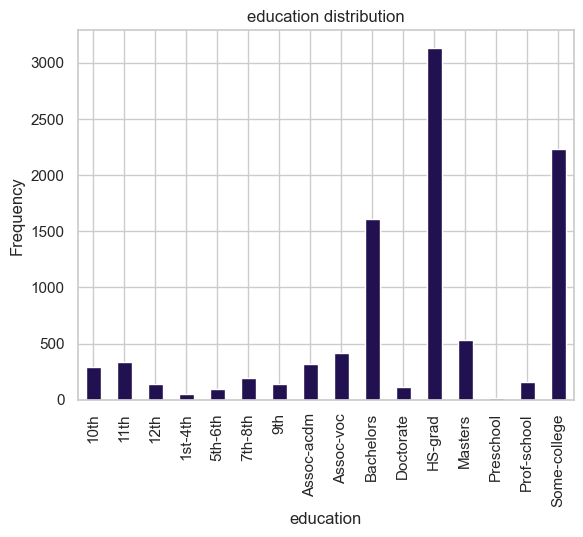

In [96]:

count_classes = pd.value_counts(test_data['education'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("education distribution")
plt.xlabel("education")
plt.ylabel("Frequency")


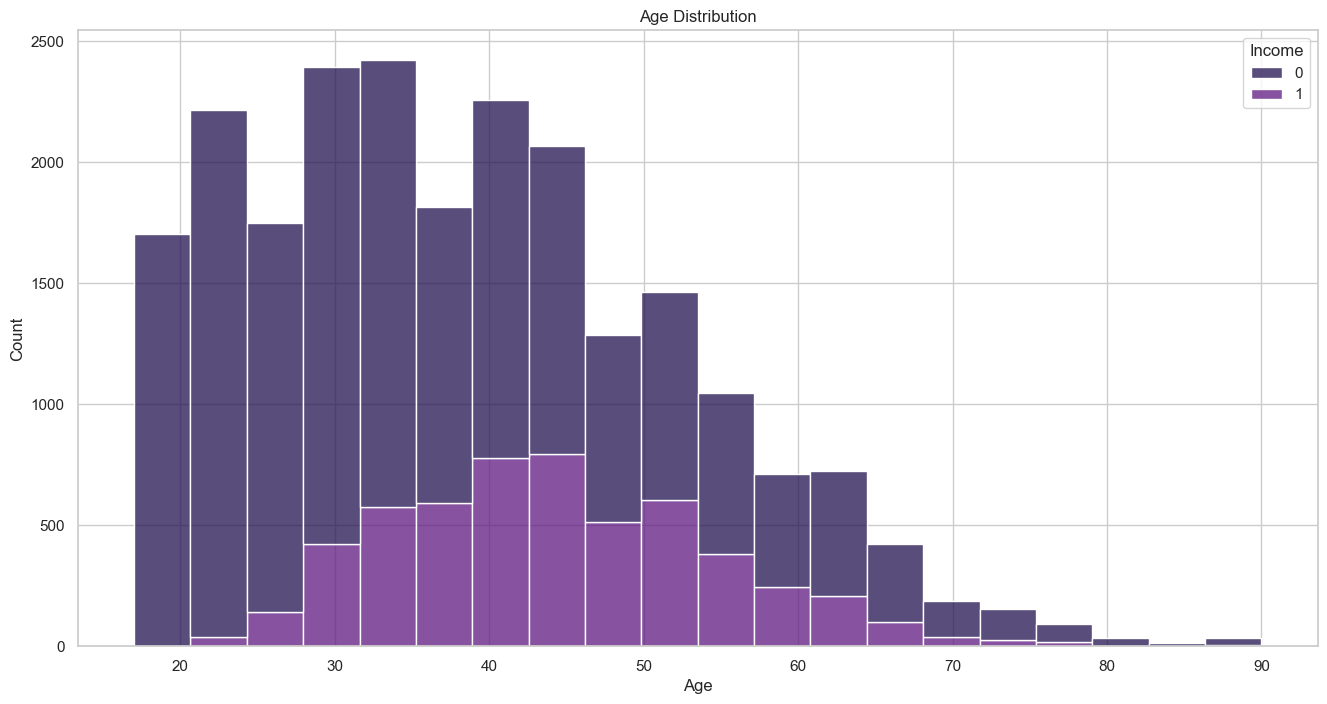

In [97]:

# count_classes = pd.value_counts(test_data['age'], sort=True).sort_index()
# count_classes.plot(kind='bar')
# plt.title("age distribution")
# plt.xlabel("age")
# plt.ylabel("Frequency")

# Age
plt.figure(figsize=(16, 8))
sns.set_style("whitegrid")
sns.set_theme(style="whitegrid")
sns.set_palette("magma")
sns.histplot(data=train_data, x='age', hue='Income', bins=20, multiple='stack')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

In [98]:
train_data.groupby('workclass').size()

workclass
?                    1278
Federal-gov           678
Local-gov            1489
Never-worked            5
Private             15879
Self-emp-inc          792
Self-emp-not-inc     1734
State-gov             929
Without-pay             8
dtype: int64

**age distribution for workclass "?"** 
 count    1278.000000
mean       41.017997
std        20.377306
min        17.000000
25%        21.000000
50%        35.000000
75%        61.000000
max        90.000000
Name: age, dtype: float64


<Axes: title={'center': 'age distribution for workclass "?"'}, xlabel='age', ylabel='Count'>

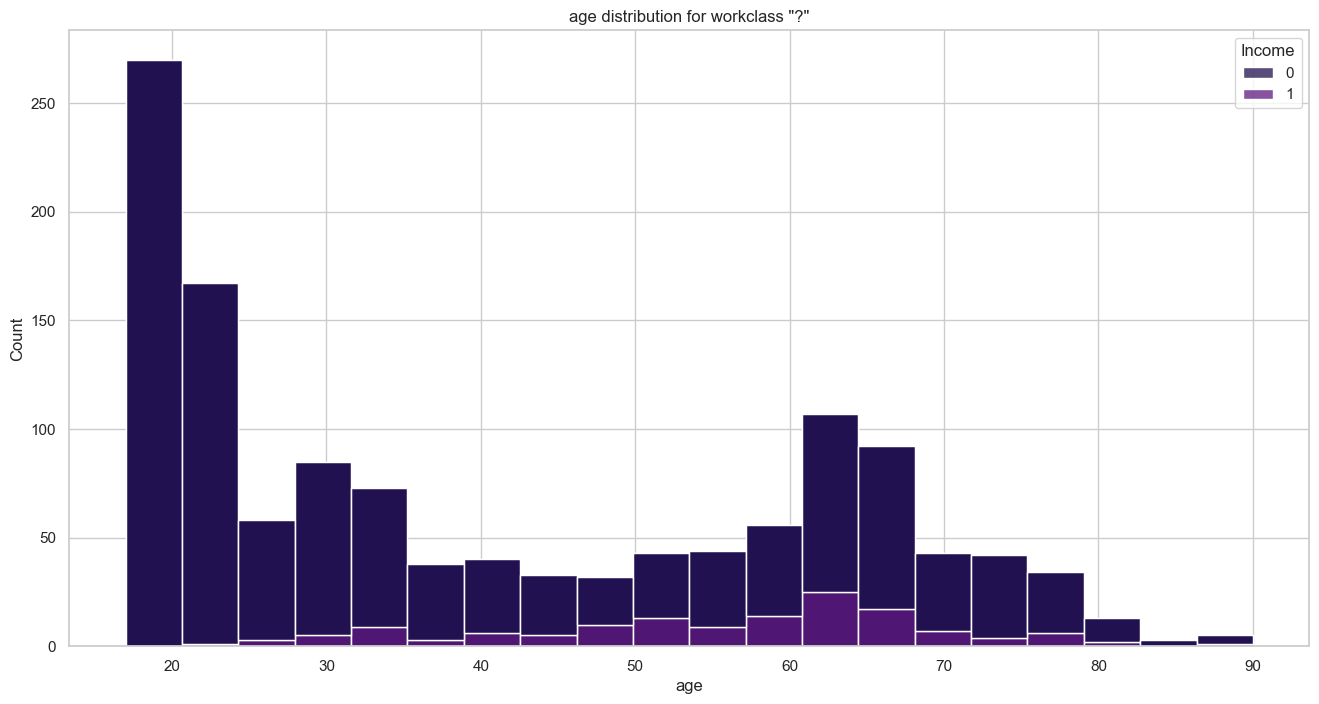

In [99]:
workclass_unknown = train_data.loc[train_data['workclass'] == '?']
print('**age distribution for workclass "?"** \n', workclass_unknown['age'].describe())
plt.figure(figsize=(16, 8))
plt.title('age distribution for workclass "?"')
plt.hist(workclass_unknown['age'], bins=20)
sns.histplot(data=train_data.loc[train_data['workclass'] == '?'], x='age', hue='Income', bins=20, multiple='stack')

Text(0, 0.5, 'Frequency')

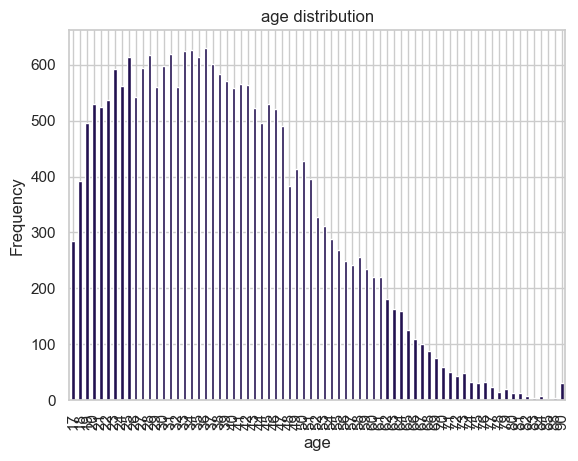

In [100]:

count_classes = pd.value_counts(train_data['age'], sort=True).sort_index()
count_classes.plot(kind='bar')
plt.title("age distribution")
plt.xlabel("age")
plt.ylabel("Frequency")


In [101]:
print(train_data.query('age < 20').groupby('workclass').size())
print(train_data.query('age > 20 and age < 60').groupby('workclass').size())
print(train_data.query('age > 60').groupby('workclass').size())

workclass
?                   191
Federal-gov           6
Local-gov            30
Never-worked          3
Private             878
Self-emp-inc         12
Self-emp-not-inc     26
State-gov            24
Without-pay           2
dtype: int64
workclass
?                     648
Federal-gov           615
Local-gov            1331
Never-worked            1
Private             13702
Self-emp-inc          663
Self-emp-not-inc     1426
State-gov             824
Without-pay             4
dtype: int64
workclass
?                   339
Federal-gov          44
Local-gov           104
Private             765
Self-emp-inc        104
Self-emp-not-inc    244
State-gov            54
Without-pay           2
dtype: int64


Text(0.5, 1.0, 'Workclass')

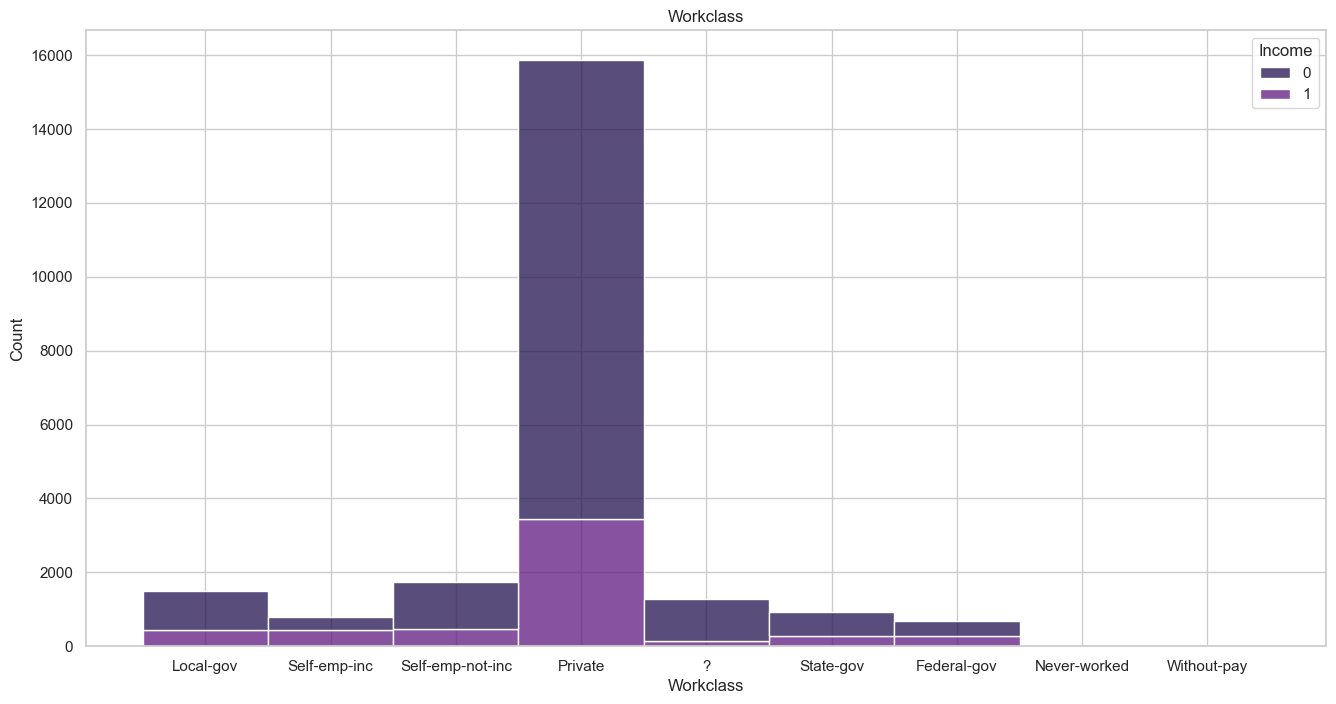

In [102]:

plt.figure(figsize=(16, 8))
sns.histplot(data=train_data, x='workclass', hue='Income', multiple='stack')
plt.xlabel('Workclass')
plt.title('Workclass')


Text(0.5, 0, 'Final Weight')

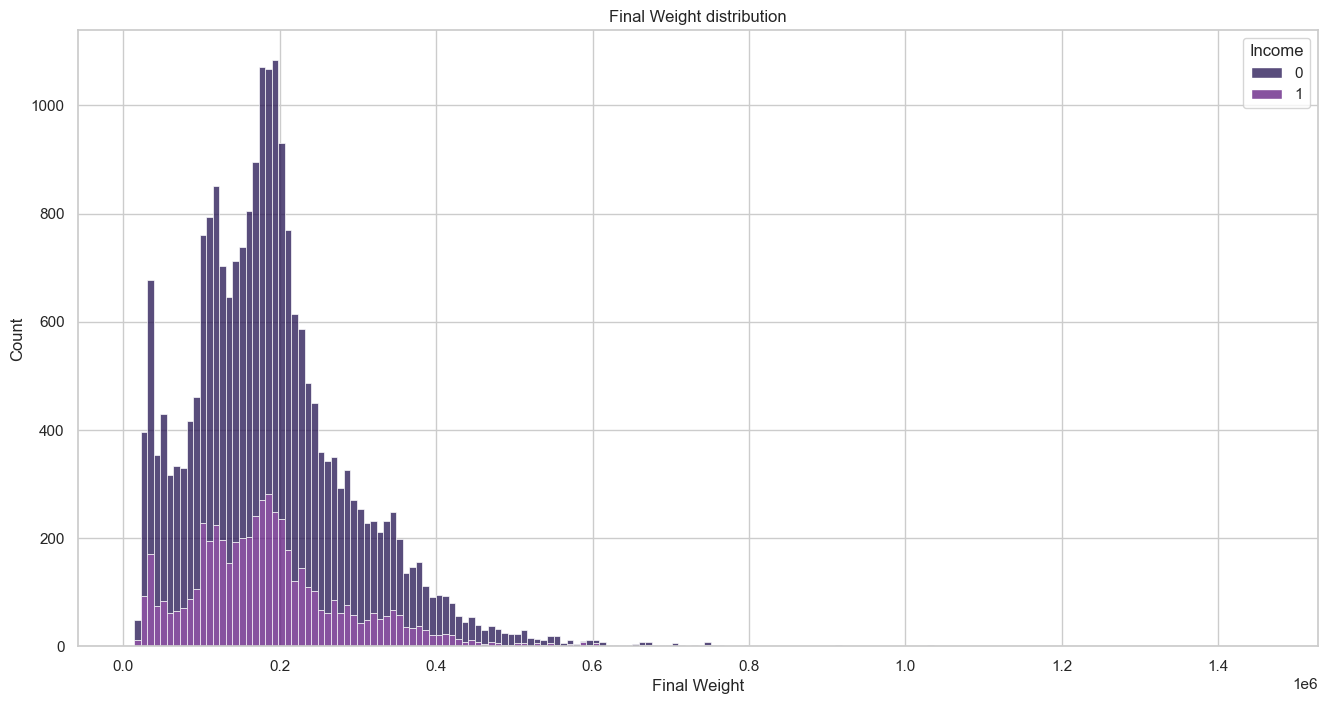

In [103]:
# Final Weight
plt.figure(figsize=(16, 8))
sns.histplot(x='fnlwgt', data=train_data, hue='Income', multiple='stack')
plt.title('Final Weight distribution')
plt.xlabel('Final Weight')



In [104]:

# Education
train_data.groupby('education').size()

education
10th             641
11th             840
12th             292
1st-4th          121
5th-6th          239
7th-8th          451
9th              374
Assoc-acdm       752
Assoc-voc        970
Bachelors       3742
Doctorate        297
HS-grad         7367
Masters         1193
Preschool         39
Prof-school      414
Some-college    5060
dtype: int64

([<matplotlib.patches.Wedge at 0x20e87ef4dd0>,
 [Text(1.0957092707827263, 0.09706283491010402, '10th'),
  Text(1.0532813867675739, 0.3171723826075915, '11th'),
  Text(0.9911972823427058, 0.47699889672454643, '12th'),
  Text(0.9624522419653586, 0.5326215184686542, '1st-4th'),
  Text(0.9348489282998876, 0.5797046500215016, '5th-6th'),
  Text(0.8755726206513547, 0.665862287538286, '7th-8th'),
  Text(0.7943614867485447, 0.7609138113943272, '9th'),
  Text(0.6671890525013423, 0.874562043666635, 'Assoc-acdm'),
  Text(0.4428440100989255, 1.006920643705105, 'Assoc-voc'),
  Text(-0.25628861215194265, 1.0697271368350114, 'Bachelors'),
  Text(-0.7828400880541888, 0.7727621862742186, 'Doctorate'),
  Text(-1.057927635929925, -0.3013123248984682, 'HS-grad'),
  Text(-0.124516921239224, -1.0929297947833179, 'Masters'),
  Text(0.061980178912668216, -1.0982524561420084, 'Preschool'),
  Text(0.13039015779217245, -1.0922446643270602, 'Prof-school'),
  Text(0.8431251170817835, -0.7064984337886595, 'Some-col

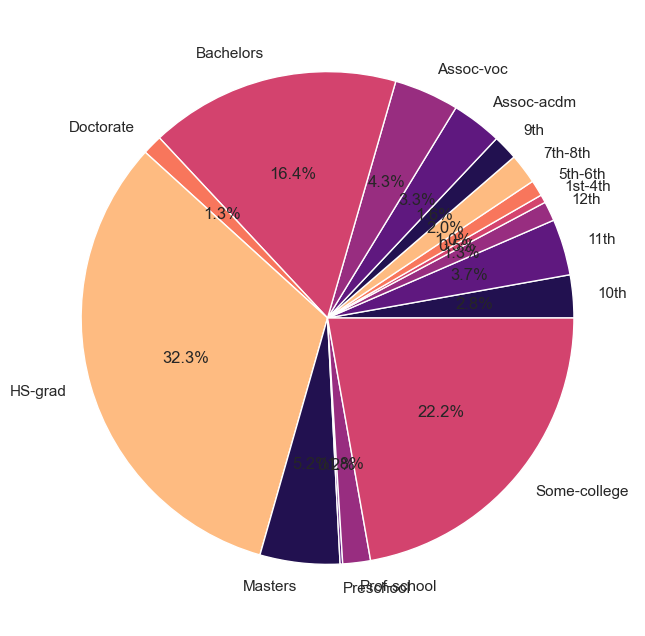

In [105]:

plt.figure(figsize=(16, 8))
plt.pie(train_data.groupby('education').size(), labels=train_data.groupby('education').size().index, autopct='%1.1f%%')


<Axes: xlabel='education', ylabel='count'>

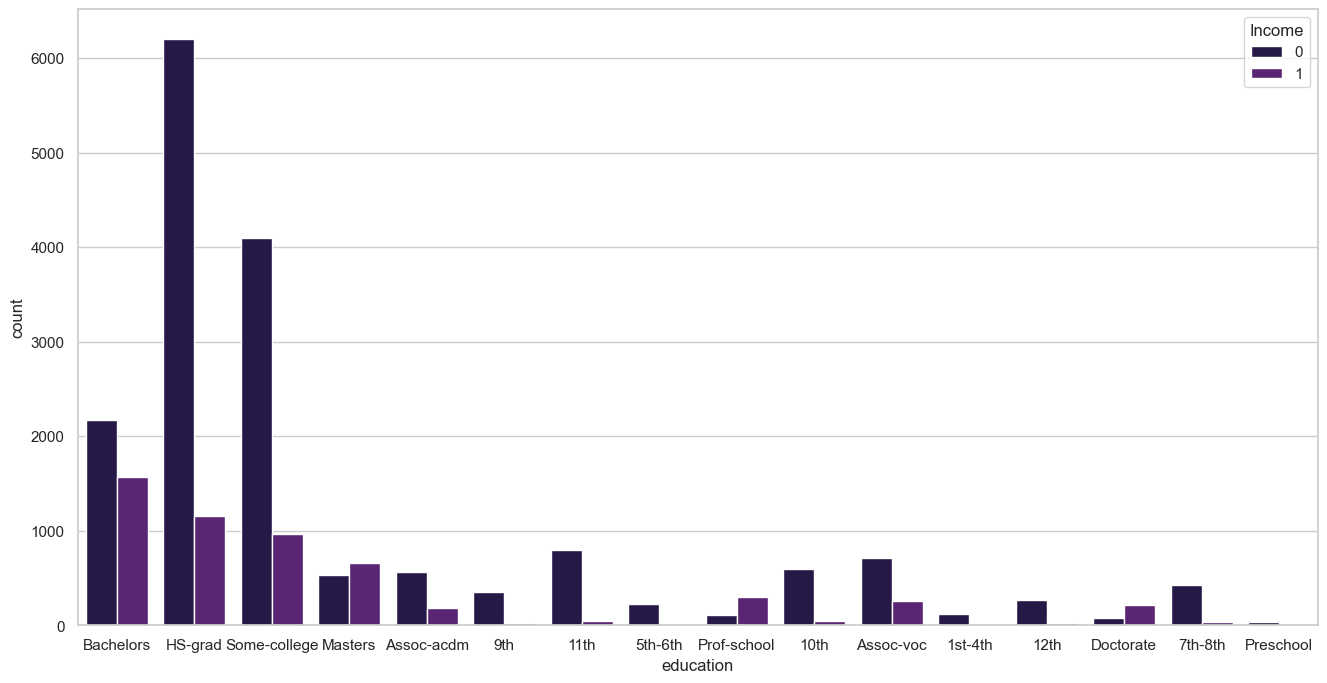

In [106]:

plt.figure(figsize=(16, 8))
sns.countplot(x='education', data=train_data, hue='Income')


In [107]:
# Education Number
train_data.groupby('education.num').size()


education.num
1       39
2      121
3      239
4      451
5      374
6      641
7      840
8      292
9     7367
10    5060
11     970
12     752
13    3742
14    1193
15     414
16     297
dtype: int64

In [108]:
train_data['education.num'].describe()


count    22792.000000
mean        10.075509
std          2.584257
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

<Axes: xlabel='education.num', ylabel='count'>

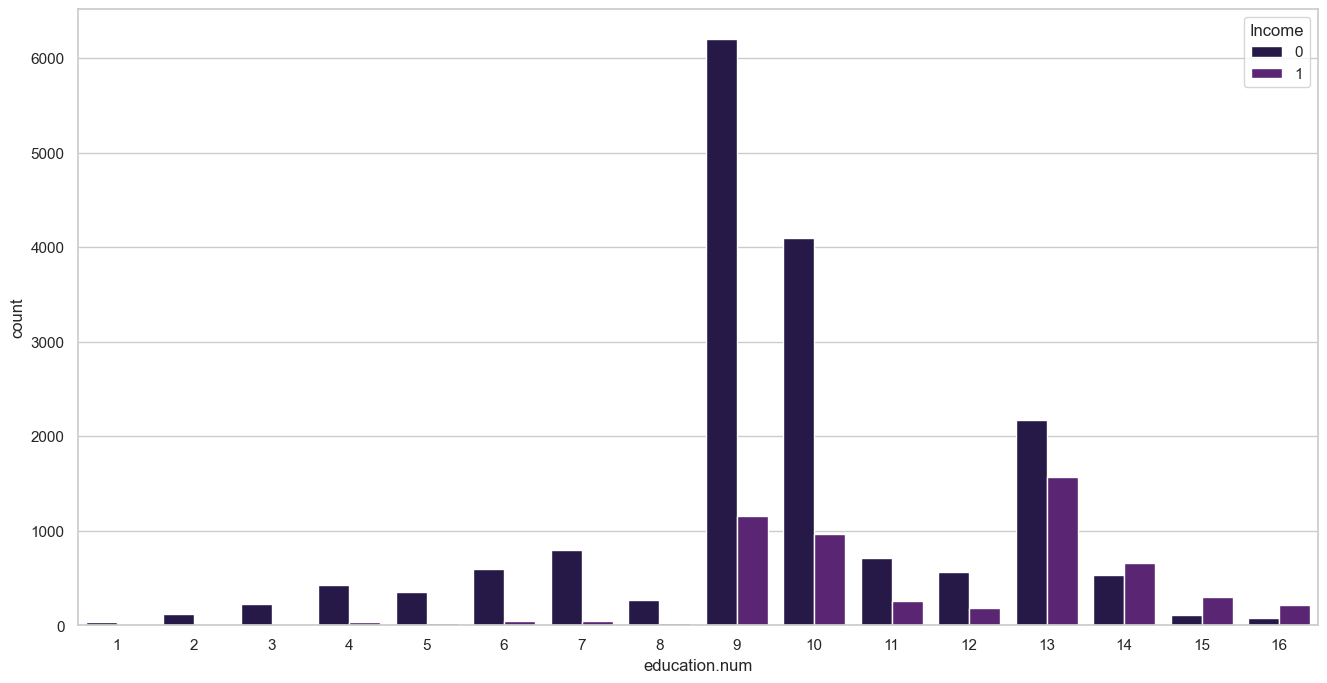

In [109]:
plt.figure(figsize=(16, 8))
sns.countplot(x='education.num', data=train_data, hue='Income')


marital.status
Divorced                  3103
Married-AF-spouse           17
Married-civ-spouse       10452
Married-spouse-absent      291
Never-married             7499
Separated                  736
Widowed                    694
dtype: int64


<Axes: xlabel='marital.status', ylabel='count'>

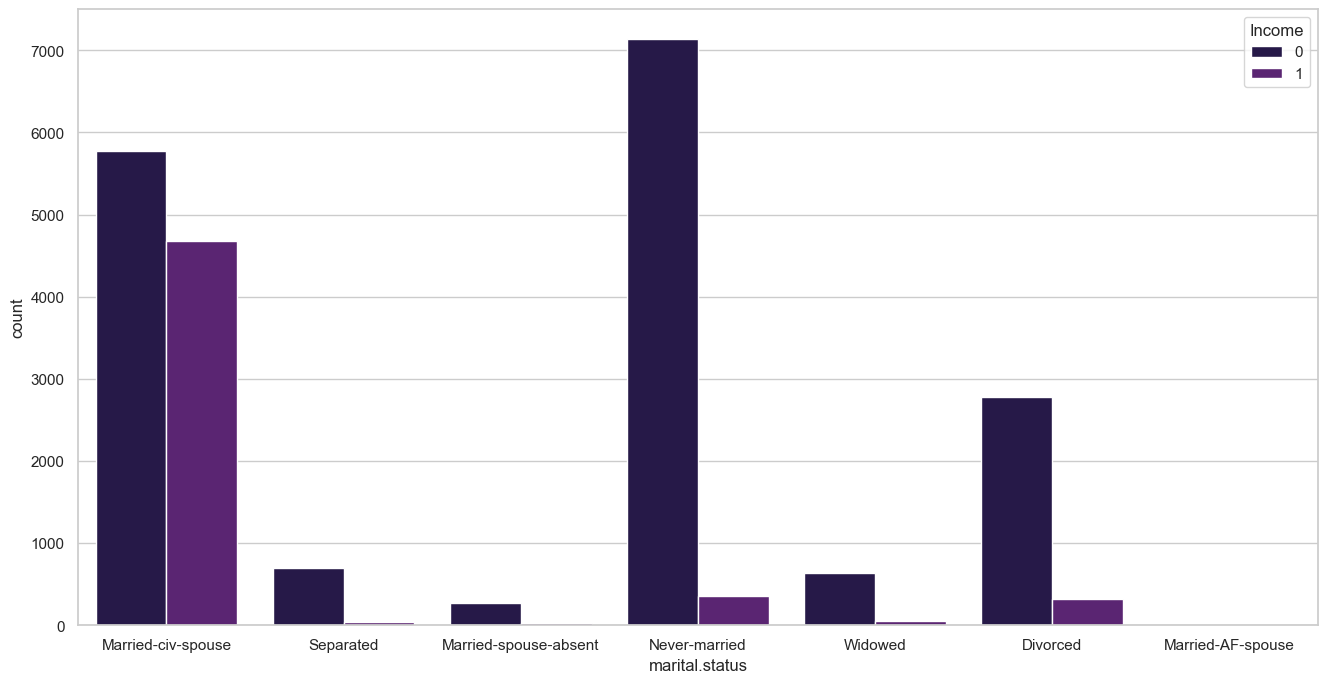

In [110]:
# marital status
print(train_data.groupby('marital.status').size())
plt.figure(figsize=(16, 8))
sns.countplot(data=train_data, x='marital.status', hue='Income')


occupation
?                    1283
Adm-clerical         2652
Armed-Forces            7
Craft-repair         2876
Exec-managerial      2772
Farming-fishing       706
Handlers-cleaners     960
Machine-op-inspct    1433
Other-service        2349
Priv-house-serv       110
Prof-specialty       2907
Protective-serv       453
Sales                2505
Tech-support          629
Transport-moving     1150
dtype: int64


Text(0.5, 1.0, 'Occupation Distribution')

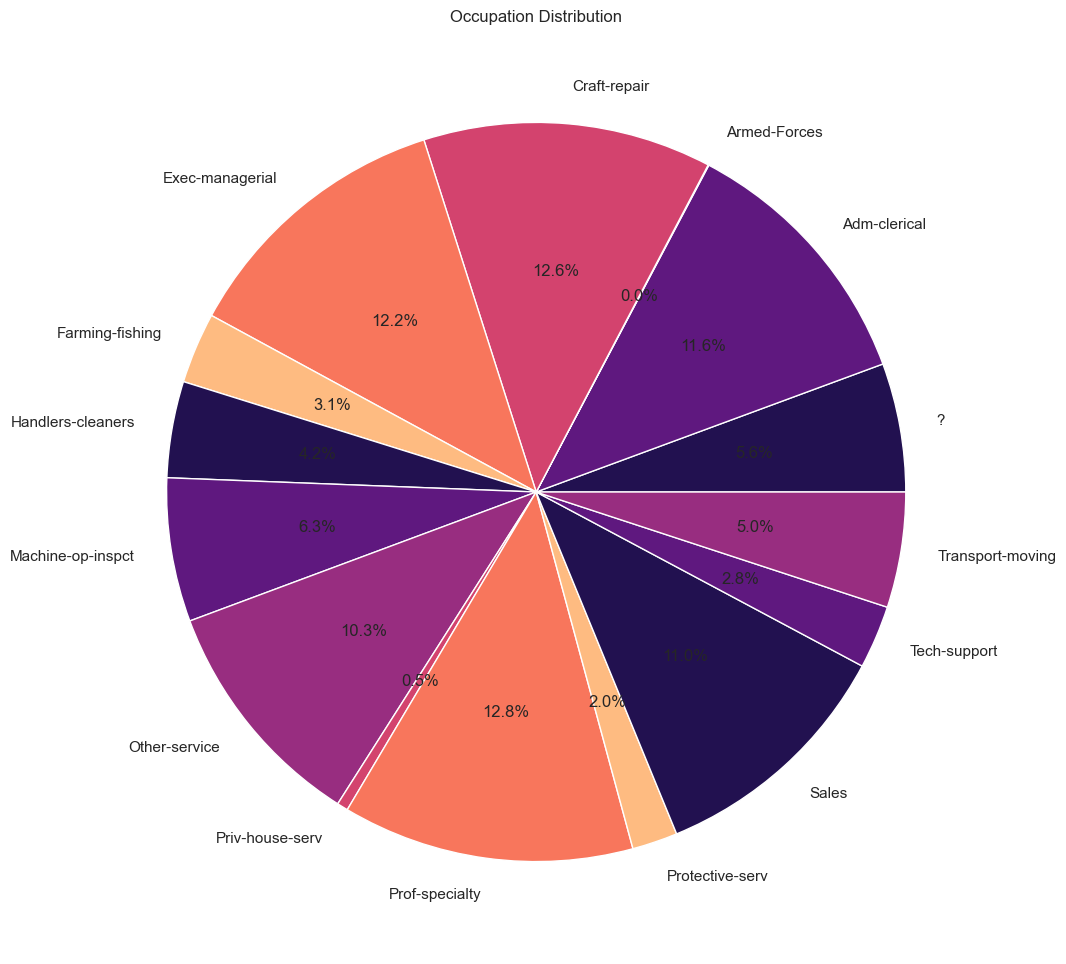

In [111]:
# Occupation
print(train_data.groupby('occupation').size())
plt.figure(figsize=(16, 12))
plt.pie(train_data.groupby('occupation').size(), labels=train_data.groupby('occupation').size().index, autopct='%1.1f%%')
plt.title('Occupation Distribution')


Text(0.5, 1.0, 'Occupation Distribution')

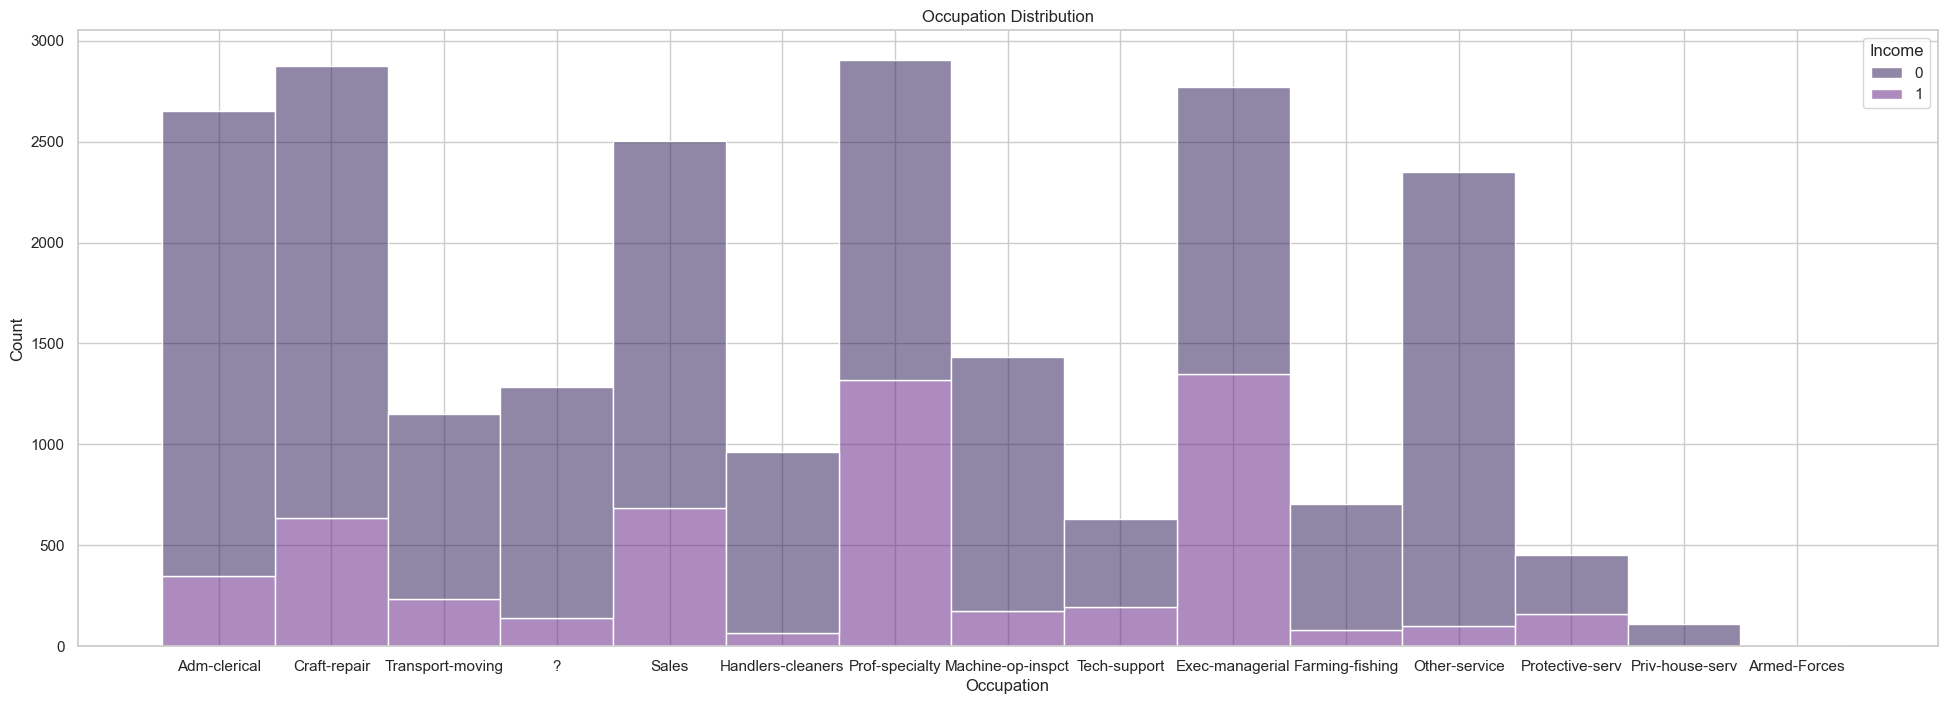

In [112]:
plt.figure(figsize=(24, 8))
sns.histplot(data=train_data, x='occupation', hue='Income', multiple='stack', alpha=0.5)
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')


Text(0.5, 1.0, 'Occupation Distribution')

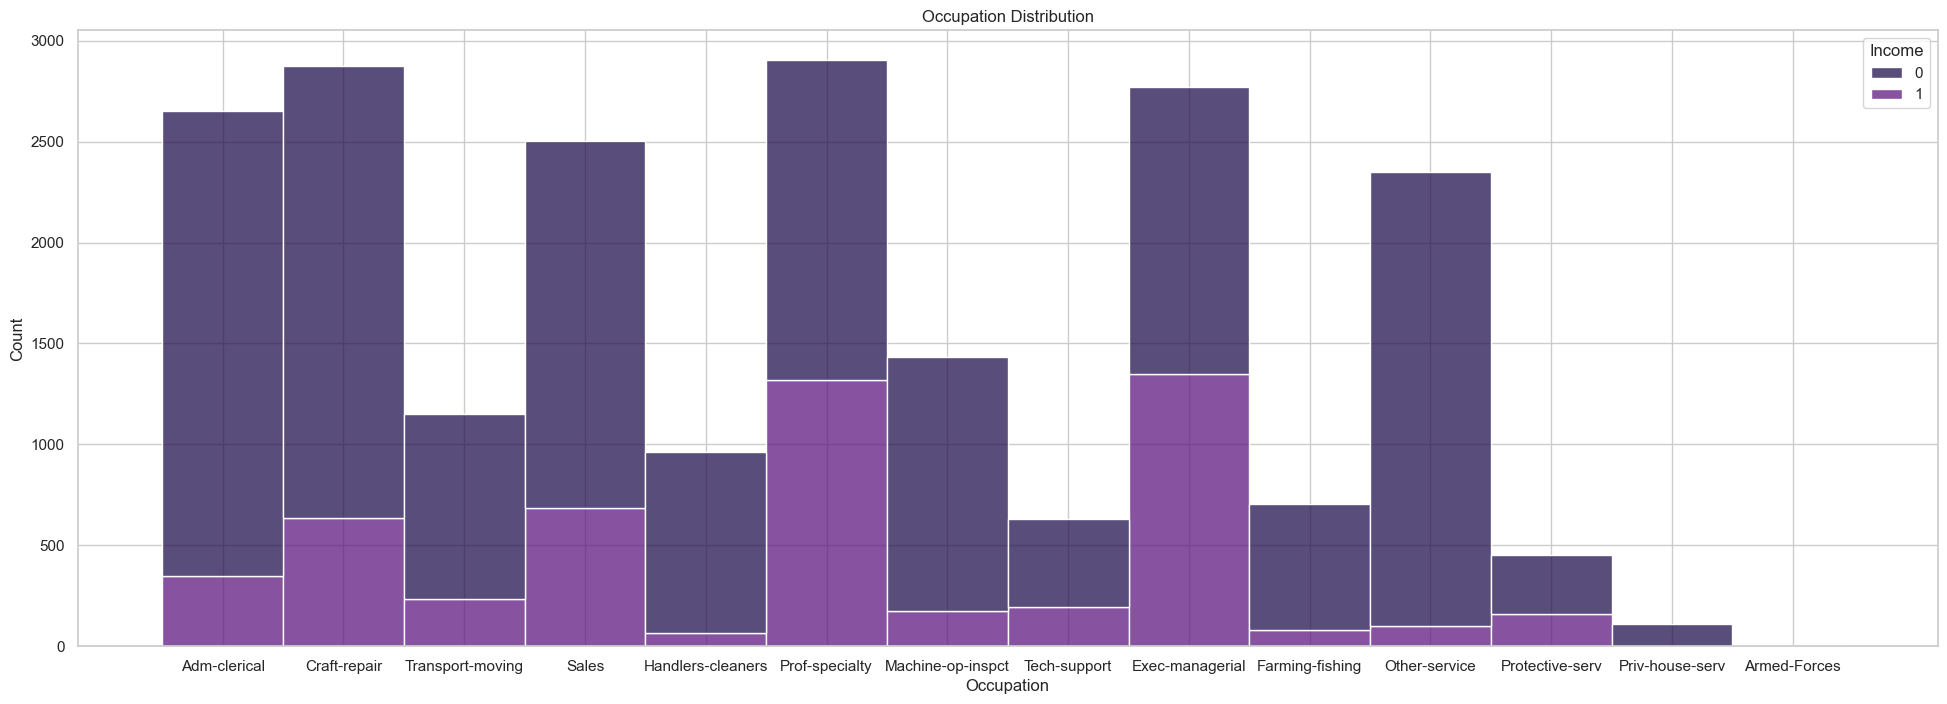

In [113]:

train_data.drop(train_data.loc[train_data['occupation'] == '?'].index, inplace=True)
plt.figure(figsize=(24, 8))
sns.histplot(data=train_data, x='occupation', hue='Income', multiple='stack')
plt.xlabel('Occupation')    
plt.title('Occupation Distribution')

relationship
Husband           8863
Not-in-family     5507
Other-relative     662
Own-child         3199
Unmarried         2273
Wife              1005
dtype: int64


<Axes: xlabel='relationship', ylabel='Count'>

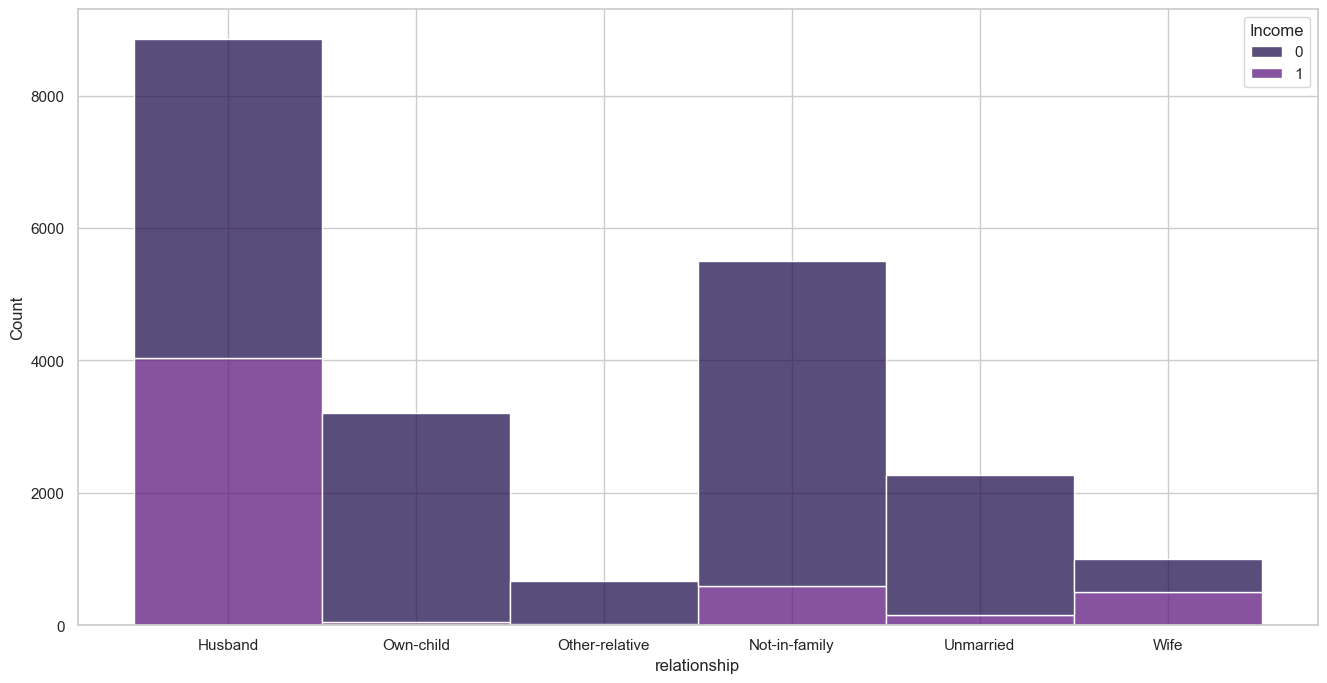

In [114]:

# Relationship
print(train_data.groupby('relationship').size())
plt.figure(figsize=(16, 8))
sns.histplot(data=train_data, x='relationship', hue='Income', multiple='stack')

race
Amer-Indian-Eskimo      201
Asian-Pac-Islander      696
Black                  2028
Other                   176
White                 18408
dtype: int64


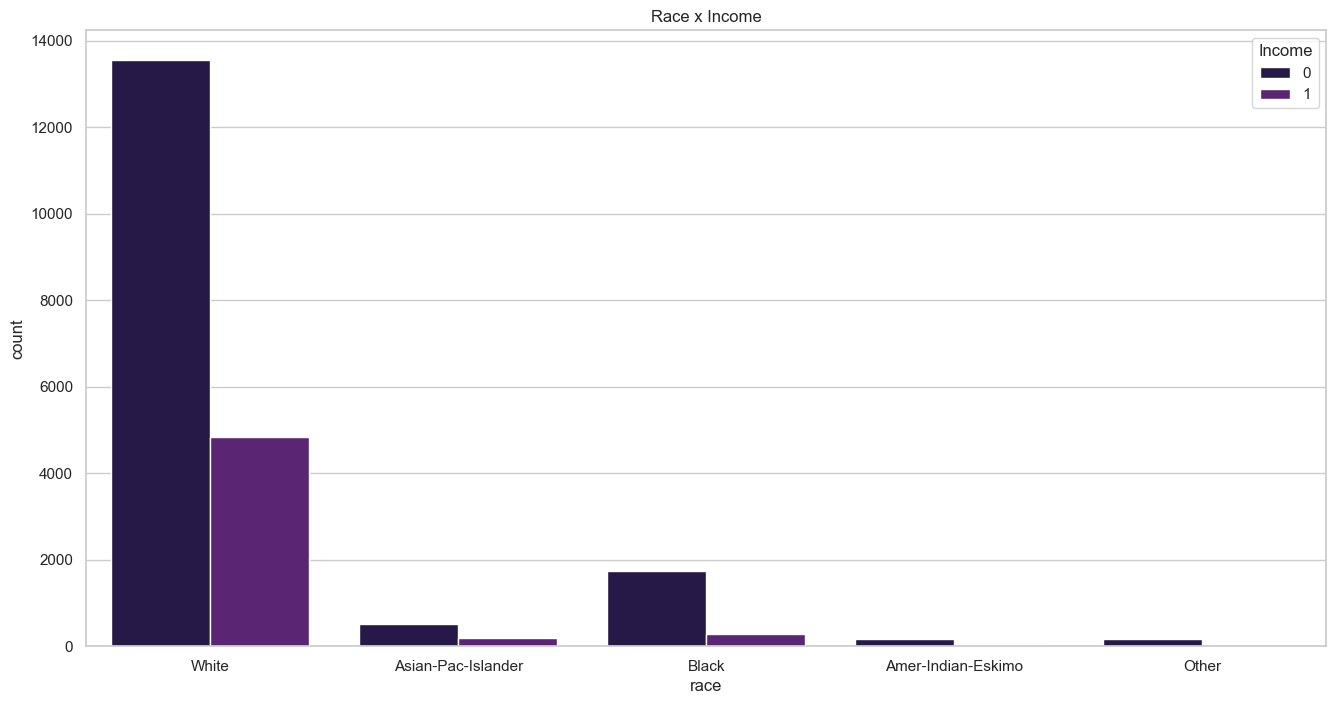

sex
Female     6946
Male      14563
dtype: int64


Text(0.5, 1.0, 'Sex x Income')

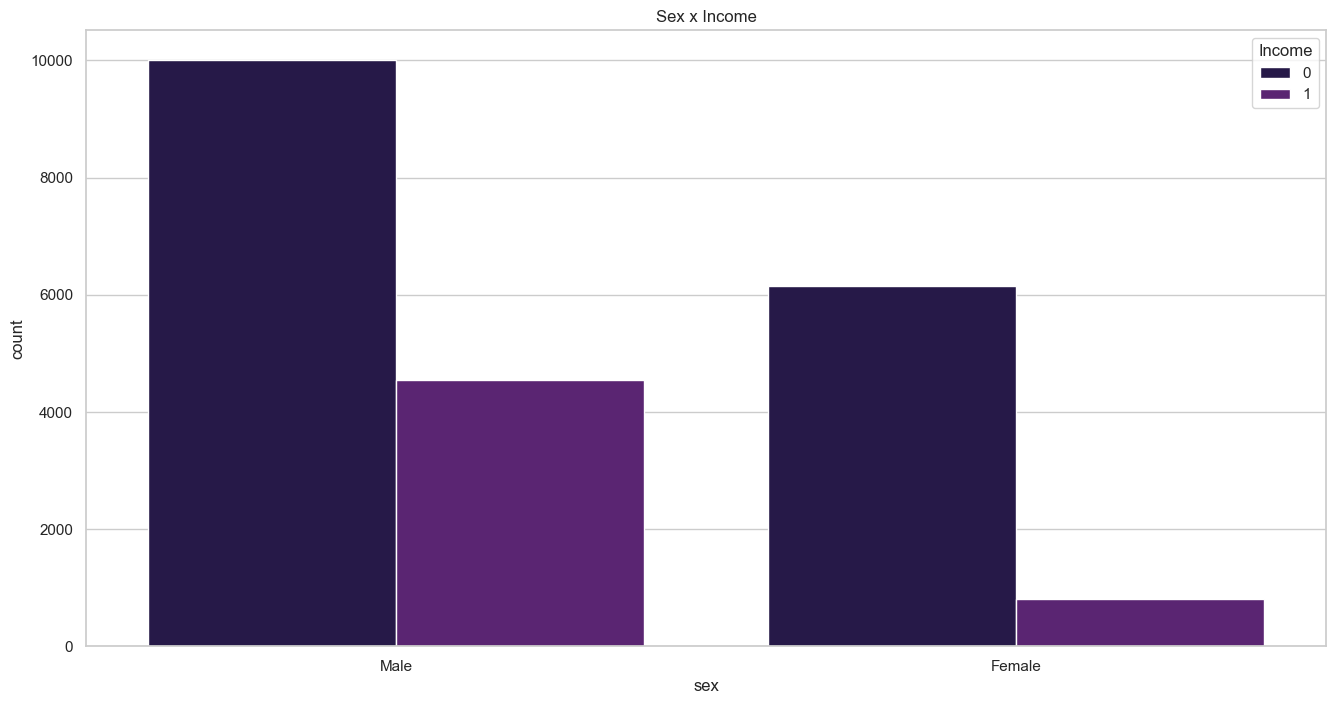

In [115]:

# Race and Sex
plt.figure(figsize=(16, 8))
print(train_data.groupby(train_data.race).size())
sns.countplot(data=train_data, x='race', hue='Income')
plt.title('Race x Income')
plt.show()
plt.figure(figsize=(16, 8))
print(train_data.groupby(train_data.sex).size())
sns.countplot(data=train_data, x='sex', hue='Income')
plt.title('Sex x Income')

In [116]:

# Capital Gain & Capital Loss
print('**** capital gain **** \n ', train_data.groupby('capital.gain').size(), '\n')
print('**** capital loss **** \n ', train_data.groupby('capital.loss').size(), '\n')


**** capital gain **** 
  capital.gain
0        19716
114          5
401          1
594         21
914          7
         ...  
25236        7
27828       25
34095        3
41310        1
99999      103
Length: 115, dtype: int64 

**** capital loss **** 
  capital.loss
0       20508
213         2
323         2
625         7
653         3
        ...  
2824        4
3004        2
3683        2
3770        2
3900        2
Length: 85, dtype: int64 


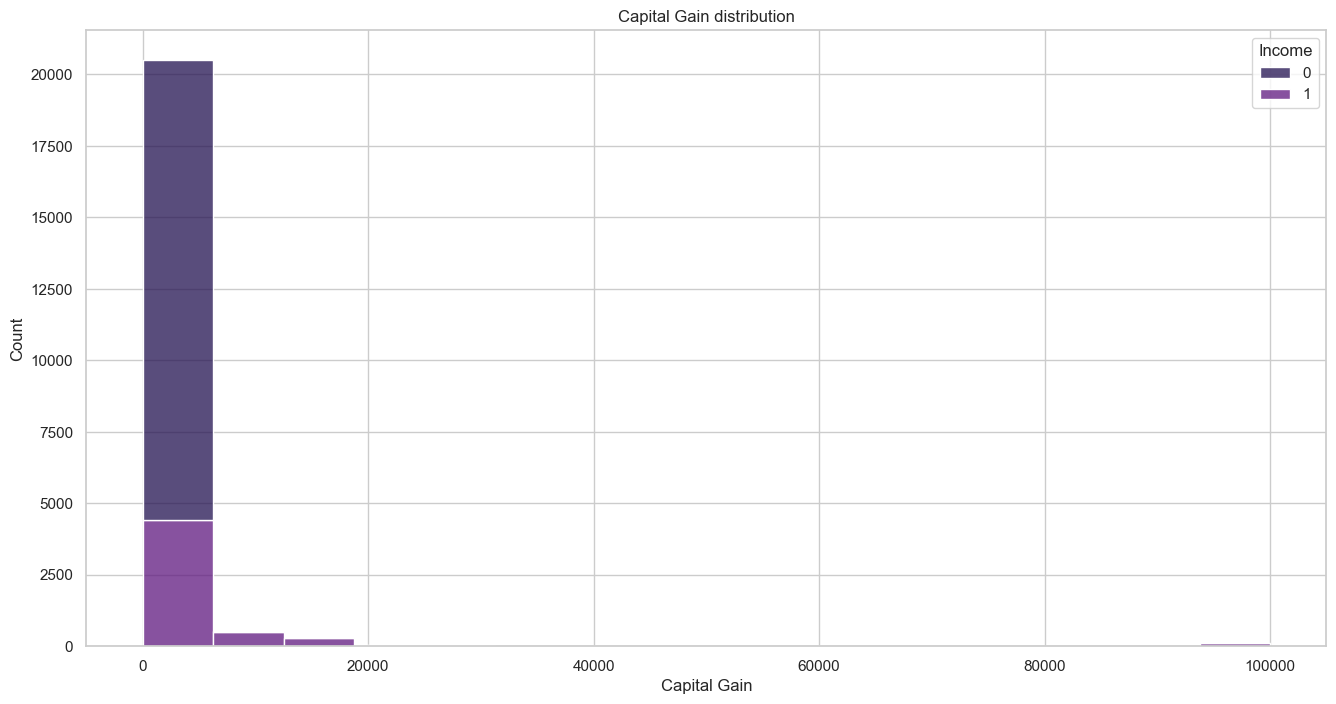

Text(0.5, 0, 'Capital Loss')

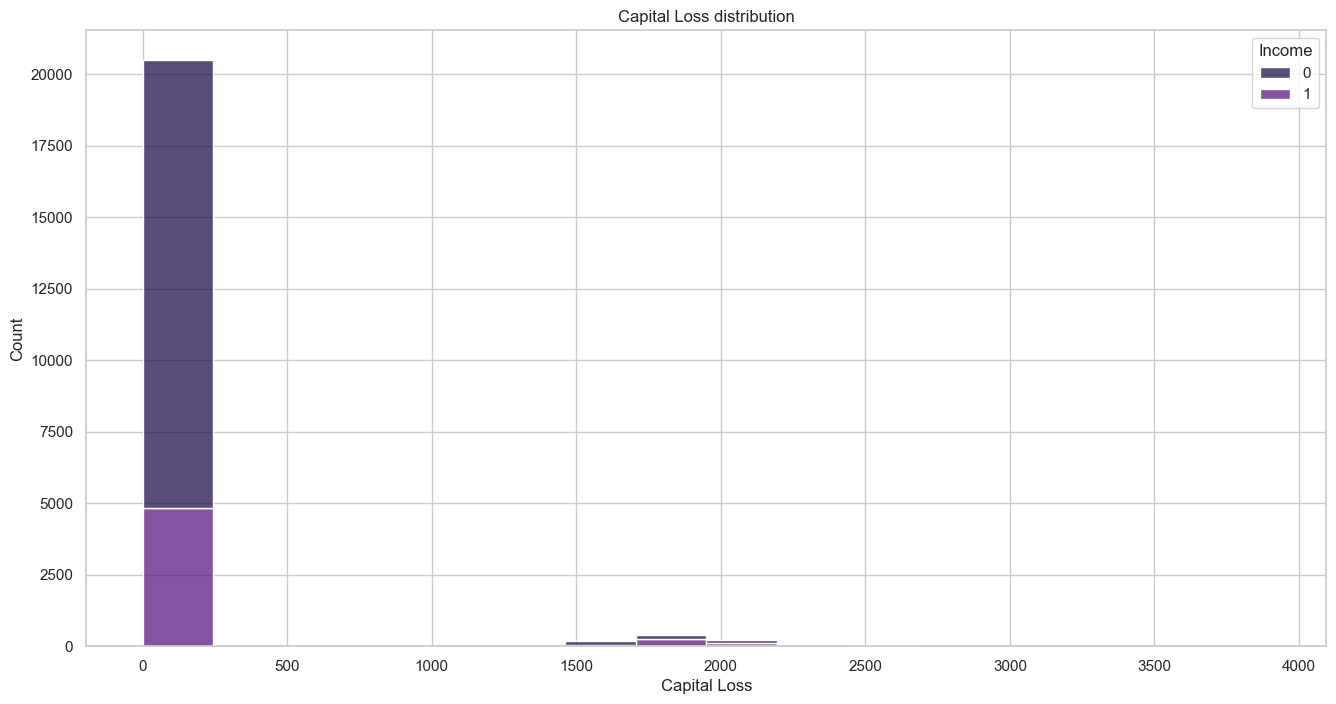

In [117]:

plt.figure(figsize=(16, 8))
sns.histplot(x='capital.gain', data=train_data, hue='Income', multiple='stack')
plt.title('Capital Gain distribution')
plt.xlabel('Capital Gain')
plt.show()
plt.figure(figsize=(16, 8))
sns.histplot(x='capital.loss', data=train_data, hue='Income', multiple='stack')
plt.title('Capital Loss distribution')
plt.xlabel('Capital Loss')

In [118]:

# Hours per week
train_data.groupby('hours.per.week').size()


hours.per.week
1      6
2     11
3     12
4     18
5     25
      ..
92     1
94     1
95     2
98     7
99    54
Length: 92, dtype: int64

In [119]:

train_data = train_data.drop(columns=['hours.per.week'])

In [120]:

# Native Country
train_data.groupby('native.country').size()

native.country
?                               405
Cambodia                         13
Canada                           65
China                            54
Columbia                         36
Cuba                             70
Dominican-Republic               44
Ecuador                          21
El-Salvador                      68
England                          65
France                           18
Germany                          85
Greece                           19
Guatemala                        47
Haiti                            22
Honduras                          7
Hong                             13
Hungary                           8
India                            61
Iran                             27
Ireland                          17
Italy                            52
Jamaica                          55
Japan                            42
Laos                             11
Mexico                          442
Nicaragua                        19
Outlying-US(G

([<matplotlib.patches.Wedge at 0x20e8b269d10>,
 [Text(1.0980759985736384, 0.06503154124351841, '?'),
  Text(1.0920622275985086, 0.13190940471620466, 'Cambodia'),
  Text(1.0904885943253837, 0.14434204393124284, 'Canada'),
  Text(1.0878151857095715, 0.16327315070044696, 'China'),
  Text(1.0855749787554334, 0.1775583439327492, 'Columbia'),
  Text(1.0826959723545078, 0.1943435912175322, 'Cuba'),
  Text(1.0793100656902006, 0.2123435473467818, 'Dominican-Republic'),
  Text(1.0772454945303065, 0.22258064721389284, 'Ecuador'),
  Text(1.074261169357295, 0.2365648748464094, 'El-Salvador'),
  Text(1.0694632827405681, 0.25738742562481154, 'England'),
  Text(1.0662644821294294, 0.27033322797847104, 'France'),
  Text(1.0620770500203303, 0.28634304569888347, 'Germany'),
  Text(1.0576050838941948, 0.3024425342460172, 'Greece'),
  Text(1.0546404658344497, 0.3126235560934193, 'Guatemala'),
  Text(1.051436308516017, 0.32323627447149395, 'Haiti'),
  Text(1.0500577408360485, 0.32768695566087785, 'Honduras'

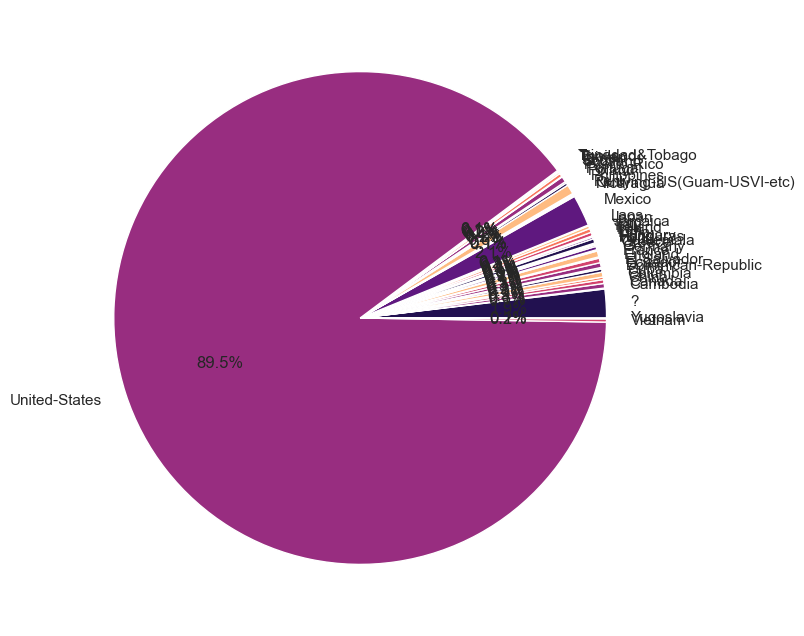

In [121]:

plt.figure(figsize=(16, 8))
plt.pie(train_data.groupby('native.country').size(), labels=train_data.groupby('native.country').size().index, autopct='%1.1f%%')
